In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [6]:
pip install datasets

In [7]:
pip install huggingface_hub

In [79]:
import datasets
from datasets import load_dataset

dataset = load_dataset("nateraw/pascal-voc-2012", split='train')
val_dataset = load_dataset("nateraw/pascal-voc-2012", split='val')

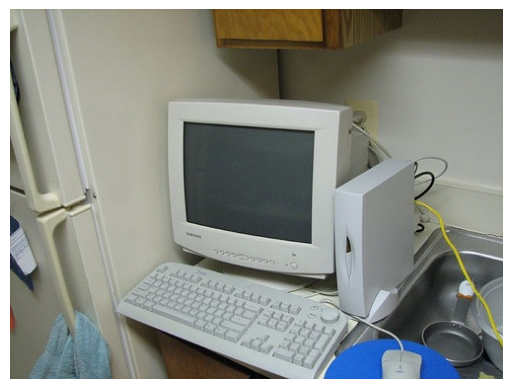

In [82]:
from datasets import load_dataset
import matplotlib.pyplot as plt

image_data = dataset[1]["image"]
image_data = np.array(image_data, dtype=np.uint8)

# 이미지 표시
plt.imshow(image_data)
plt.axis('off')  # 축 제거
plt.show()


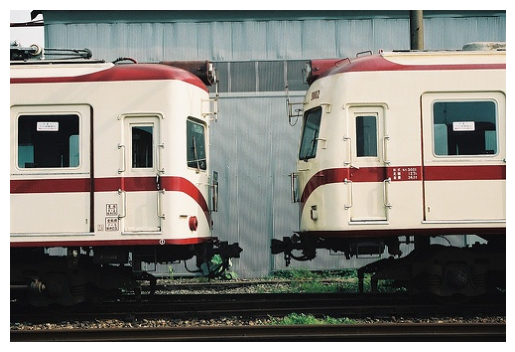

In [83]:
# 첫 번째 이미지 선택
image_data = val_dataset[1]["image"]
image_data = np.array(image_data, dtype=np.uint8)

# 이미지 표시
plt.imshow(image_data)
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
#데이터 전처리

In [45]:
#데이터 확장(augmentation)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [11]:
#U-net모델 구현

inputs = layers.Input(shape=(200, 200, 3))
x = data_augmentation(inputs)

# Contracting path 시작
conv0 = layers.Conv2D(64, activation='relu', kernel_size = 3)(x)
conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)


conv3 = layers.Conv2D(128, activation='relu', kernel_size = 3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv3)
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)


conv6 = layers.Conv2D(256, activation='relu', kernel_size = 3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv6)
conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)


conv9 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv8)
conv10 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv9)
conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)


conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)
conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)
# Contracting path 끝

# Expanding path 시작
trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
concat01 = layers.concatenate([trans01, crop01], axis=-1)

conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)


conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)


crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)


conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
conv19 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)


crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)


conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)
# Expanding path 끝

outputs = layers.Conv2D(20, kernel_size=1)(conv21)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")
midek = get_model

NameError: ignored

In [ ]:
#모델 훈련 설정
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(save_best_only=True)
]
history = model.fit(train_dataset, epoch=20, callbacks=callbacks, batch_size=32, validation_data = val_dataset)

